## Milestone - 2 :: Prior Evaluation & Feature Selection:

In [1]:
#imports
import pandas as pd #data processing
import numpy as np #linear_algebra
import matplotlib.pyplot as plt #visual
import seaborn as sns #visual
color = sns.color_palette()
import missingno as ms
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'



In [2]:
# Get data from local
data=pd.read_csv('fake_job_postings.csv')
data_eda=pd.read_csv('fake_job_postings.csv')

#Print first 3 rows of data
data.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [3]:
#Show datatype
data.dtypes.to_frame()

,0
job_id,int64
title,object
location,object
department,object
salary_range,object
company_profile,object
description,object
requirements,object
benefits,object
telecommuting,int64


In [4]:
#Dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
# Statistical Description of the dataset

data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


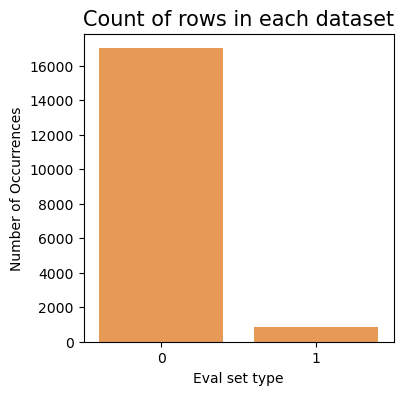

In [6]:
count = data.fraudulent.value_counts()

plt.figure(figsize=(4,4))
sns.barplot(count.index, count.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Eval set type', fontsize=10)
plt.title('Count of rows in each dataset', fontsize=15)
plt.show()

____________________________________________________________________

#### Missing Values:

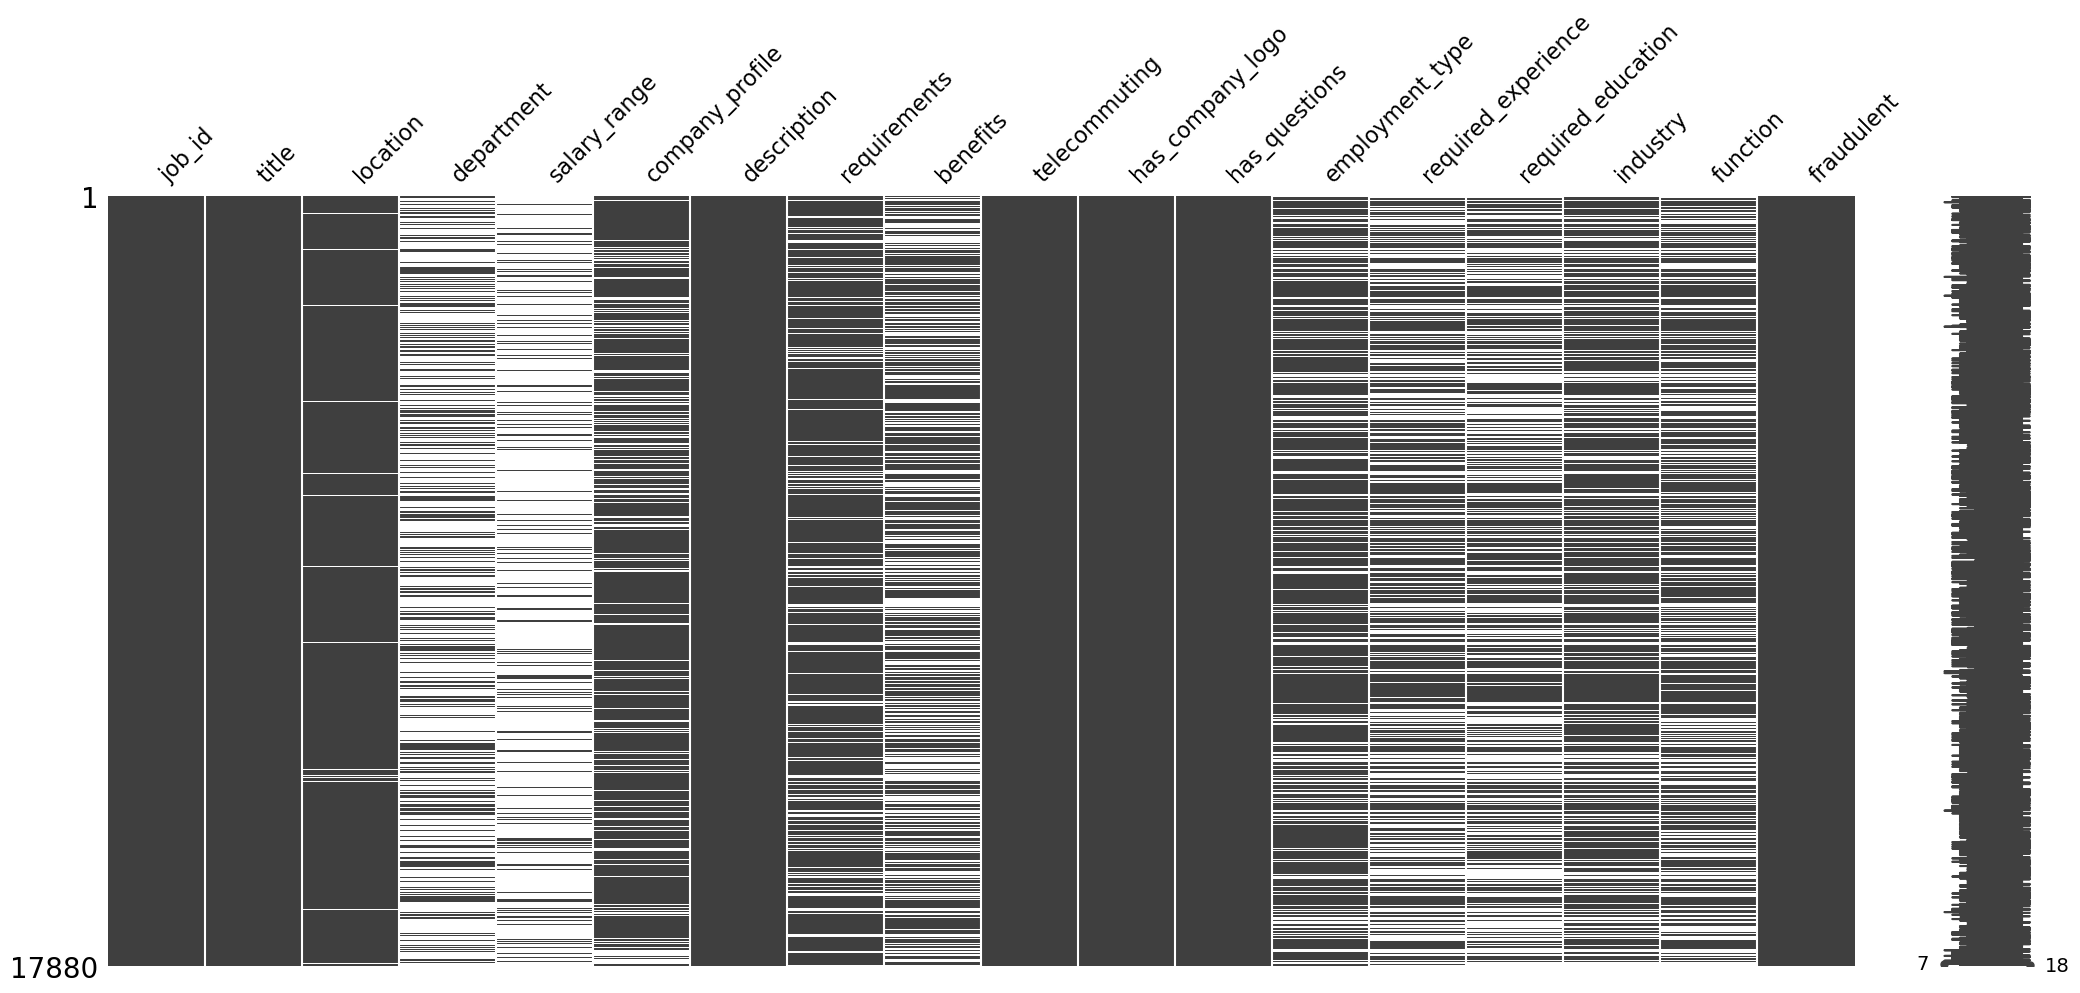

In [7]:
#Visualisation of the missing value in the entire dataset

ms.matrix(data)
plt.show()

In [8]:
# View percentage of missing values in each column
missing_percentage = round(data.isna().sum() * 100 / data.shape[0], 3).sort_values() 

missing_percentage

job_id                  0.000
has_questions           0.000
has_company_logo        0.000
telecommuting           0.000
fraudulent              0.000
title                   0.000
description             0.006
location                1.935
requirements           15.073
company_profile        18.501
employment_type        19.413
industry               27.422
function               36.102
required_experience    39.430
benefits               40.324
required_education     45.330
department             64.581
salary_range           83.960
dtype: float64

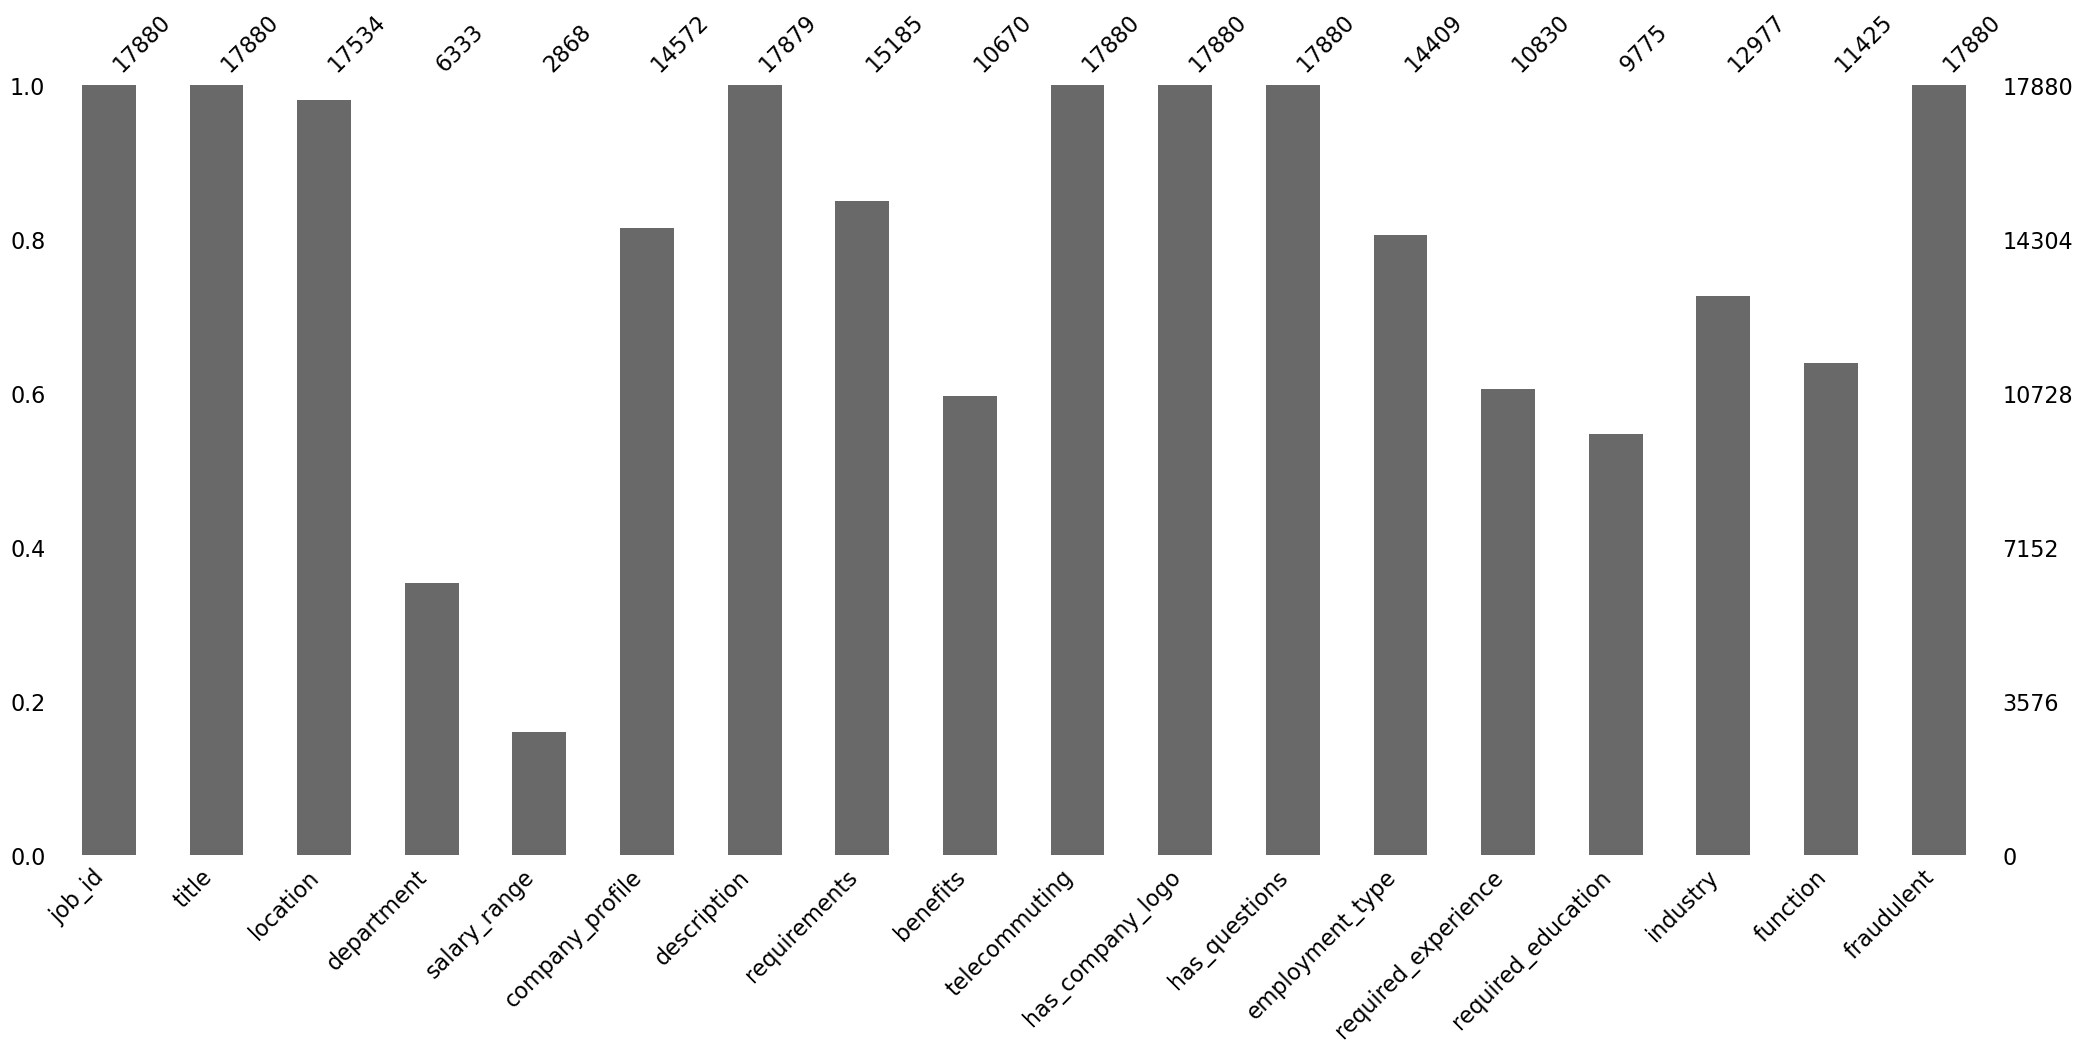

In [9]:
#missing value count plotted

ms.bar(data)

plt.show()

In [10]:
# Number of null values in each column

columns = list(data.columns)
null_columns = dict()
type_null_columns = list()
for values in columns:
    null_values = data[values].isnull().sum()
    if null_values > 0:
        null_columns[values] = null_values
        type_null_columns.append(type(data[values][0]))
    print("Number of nan values in %s is %d"%(values,null_values))

Number of nan values in job_id is 0
Number of nan values in title is 0
Number of nan values in location is 346
Number of nan values in department is 11547
Number of nan values in salary_range is 15012
Number of nan values in company_profile is 3308
Number of nan values in description is 1
Number of nan values in requirements is 2695
Number of nan values in benefits is 7210
Number of nan values in telecommuting is 0
Number of nan values in has_company_logo is 0
Number of nan values in has_questions is 0
Number of nan values in employment_type is 3471
Number of nan values in required_experience is 7050
Number of nan values in required_education is 8105
Number of nan values in industry is 4903
Number of nan values in function is 6455
Number of nan values in fraudulent is 0


In [11]:
#Number of unique values in each column 

for values in columns:
    print("Number of unique values in %s is %d"%(values,data[values].nunique()))

Number of unique values in job_id is 17880
Number of unique values in title is 11231
Number of unique values in location is 3105
Number of unique values in department is 1337
Number of unique values in salary_range is 874
Number of unique values in company_profile is 1709
Number of unique values in description is 14801
Number of unique values in requirements is 11968
Number of unique values in benefits is 6205
Number of unique values in telecommuting is 2
Number of unique values in has_company_logo is 2
Number of unique values in has_questions is 2
Number of unique values in employment_type is 5
Number of unique values in required_experience is 7
Number of unique values in required_education is 13
Number of unique values in industry is 131
Number of unique values in function is 37
Number of unique values in fraudulent is 2


In [12]:
#Display total count of null values in each column 

print(null_columns)

{'location': 346, 'department': 11547, 'salary_range': 15012, 'company_profile': 3308, 'description': 1, 'requirements': 2695, 'benefits': 7210, 'employment_type': 3471, 'required_experience': 7050, 'required_education': 8105, 'industry': 4903, 'function': 6455}


In [13]:
#Display data type of null valued columns

print(type_null_columns)

[<class 'str'>, <class 'str'>, <class 'float'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'float'>, <class 'str'>, <class 'str'>, <class 'float'>, <class 'float'>, <class 'str'>]


In [14]:
# preapre a list of cloumns which can be deleted 

length_of_dataset = len(data)
drop_list = list()
for key,value in null_columns.items():
    if value > int(length_of_dataset * 10 /100):
        print(key,":",value)
        drop_list.append(key)

department : 11547
salary_range : 15012
company_profile : 3308
requirements : 2695
benefits : 7210
employment_type : 3471
required_experience : 7050
required_education : 8105
industry : 4903
function : 6455


In [15]:
#Dropping null valued columns

for values in drop_list:
    data = data.drop(values,axis = 1)

In [16]:
#Display the dataset

data.head()

,job_id,title,location,description,telecommuting,has_company_logo,has_questions,fraudulent
0,1,Marketing Intern,"US, NY, New York","Food52, a fast-growing, James Beard Award-winn...",0,1,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever","Our client, located in Houston, is actively se...",0,1,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",THE COMPANY: ESRI – Environmental Systems Rese...,0,1,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,0


In [17]:

null_list = list(null_columns.keys())
remaining_list = [item for item in null_list if item not in drop_list]
print(remaining_list)

['location', 'description']


In [18]:
data = data.dropna()

In [19]:
data.isna().sum()

job_id              0
title               0
location            0
description         0
telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
dtype: int64

In [20]:
mapping = {k: v for v, k in enumerate(data.title.unique())}
data['title'] = data.title.map(mapping)
data.head()

,job_id,title,location,description,telecommuting,has_company_logo,has_questions,fraudulent
0,1,0,"US, NY, New York","Food52, a fast-growing, James Beard Award-winn...",0,1,0,0
1,2,1,"NZ, , Auckland",Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,0
2,3,2,"US, IA, Wever","Our client, located in Houston, is actively se...",0,1,0,0
3,4,3,"US, DC, Washington",THE COMPANY: ESRI – Environmental Systems Rese...,0,1,0,0
4,5,4,"US, FL, Fort Worth",JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,0


In [21]:
mapping = {k: v for v, k in enumerate(data.location.unique())}
data['location'] = data.location.map(mapping)
data.head()

,job_id,title,location,description,telecommuting,has_company_logo,has_questions,fraudulent
0,1,0,0,"Food52, a fast-growing, James Beard Award-winn...",0,1,0,0
1,2,1,1,Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,0
2,3,2,2,"Our client, located in Houston, is actively se...",0,1,0,0
3,4,3,3,THE COMPANY: ESRI – Environmental Systems Rese...,0,1,0,0
4,5,4,4,JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,0


In [22]:
data = data.drop('description',axis = 1)

In [23]:
data.head()

,job_id,title,location,telecommuting,has_company_logo,has_questions,fraudulent
0,1,0,0,0,1,0,0
1,2,1,1,0,1,0,0
2,3,2,2,0,1,0,0
3,4,3,3,0,1,0,0
4,5,4,4,0,1,1,0


#### Text Cleaning:

In [24]:
text = data_eda[data_eda.columns[0:-1]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

In [25]:
import re
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


# Applying the cleaning function to datasets
text = text.apply(lambda x: clean_text(x))
text.head(3)

0     internus ny new yorkmarketingwere  and weve c...
1     service  cloud video productionnz   seconds t...
2     machinery assistant cmaus ia wevervalor servi...
dtype: object

#### Exploratory Data Analysis:

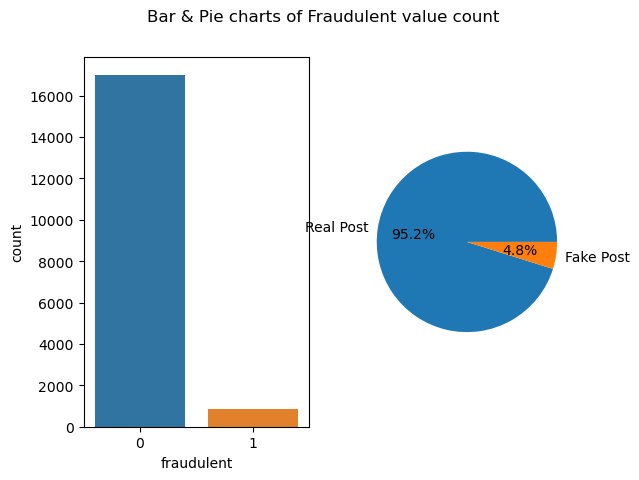

In [26]:
#Count value of target(fraudulent)
fig, ax = plt.subplots(1, 2)

sns.countplot(x='fraudulent', data= data_eda, ax=ax[0])
ax[1].pie(data_eda['fraudulent'].value_counts(), labels=['Real Post', 'Fake Post'], autopct='%0.1f%%')

fig.suptitle('Bar & Pie charts of Fraudulent value count', fontsize=12)
plt.show()

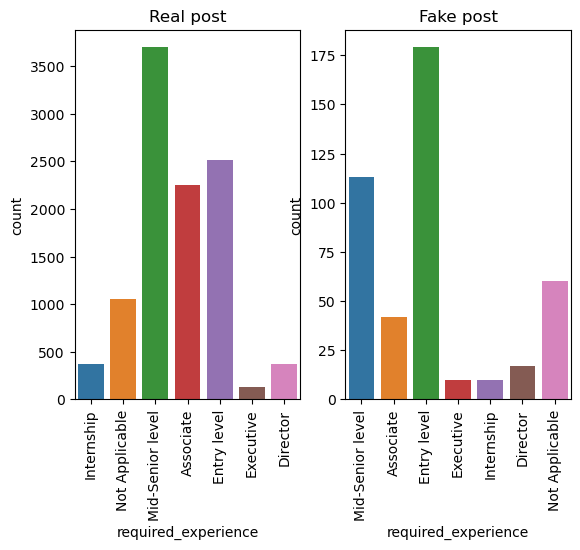

In [27]:
#Column 'Required Experience' analysis
fig, ax = plt.subplots(1, 2)

chart = sns.countplot(x = 'required_experience', data=data_eda[data_eda['fraudulent']==0], ax=ax[0])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
ax[0].set_title('Real post')

chart = sns.countplot(x = 'required_experience', data=data_eda[data_eda['fraudulent']==1], ax=ax[1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
ax[1].set_title('Fake post')
plt.show()

In [28]:
text_df = data_eda[["title", "company_profile", "description", "requirements", "benefits","fraudulent"]]
text_df = text_df.fillna(' ')

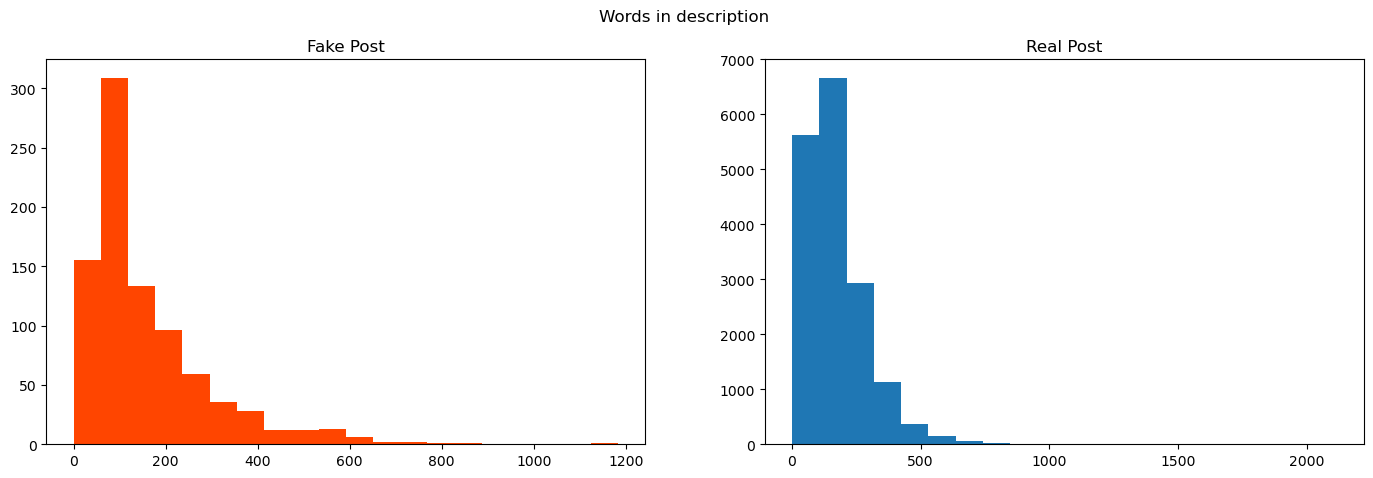

In [29]:
#Number of words (word count) on the column "Description"
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=text_df[text_df["fraudulent"]==1]['description'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orangered')
ax1.set_title('Fake Post')
num=text_df[text_df["fraudulent"]==0]['description'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in description')
plt.show()

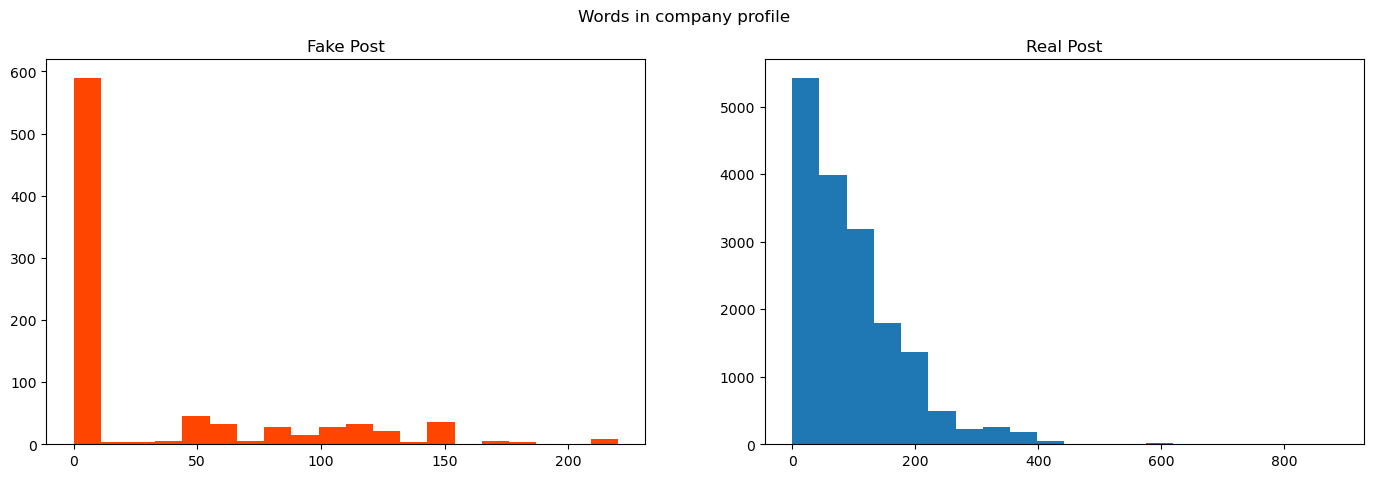

In [30]:
#Number of words (word count) on the column "Company Profile"
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
num=text_df[text_df["fraudulent"]==1]['company_profile'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 20,color='orangered')
ax1.set_title('Fake Post')
num=text_df[text_df["fraudulent"]==0]['company_profile'].str.split().map(lambda x: len(x))
ax2.hist(num, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Words in company profile')
plt.show()

### Correlation Matrix:

In [31]:
cor = data.corr()
cor

,job_id,title,location,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,0.612436,0.184705,-0.004909,-0.013640,-0.088178,0.078685
title,0.612436,1.000000,0.113033,-0.006381,0.021109,-0.031114,0.051691
location,0.184705,0.113033,1.000000,-0.013424,-0.054875,-0.013587,0.080556
telecommuting,-0.004909,-0.006381,-0.013424,1.000000,-0.019339,0.020481,0.035609
has_company_logo,-0.013640,0.021109,-0.054875,-0.019339,1.000000,0.233162,-0.258901
has_questions,-0.088178,-0.031114,-0.013587,0.020481,0.233162,1.000000,-0.088870
fraudulent,0.078685,0.051691,0.080556,0.035609,-0.258901,-0.088870,1.000000


<AxesSubplot:>

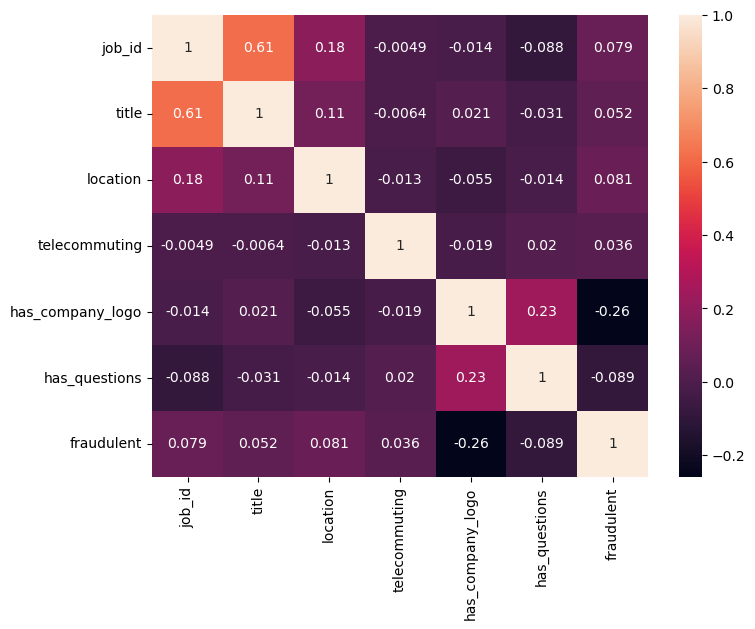

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(cor,annot=True)